/Users/chihiro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

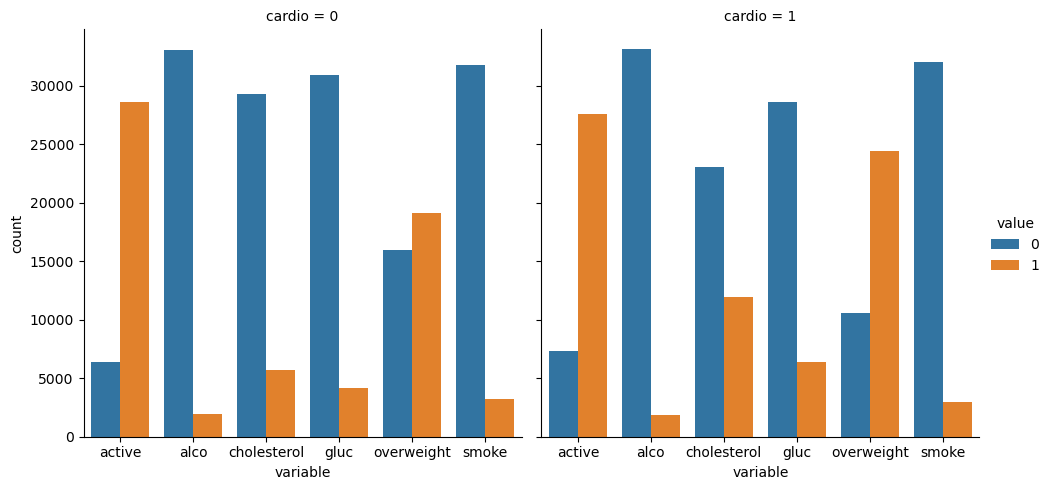

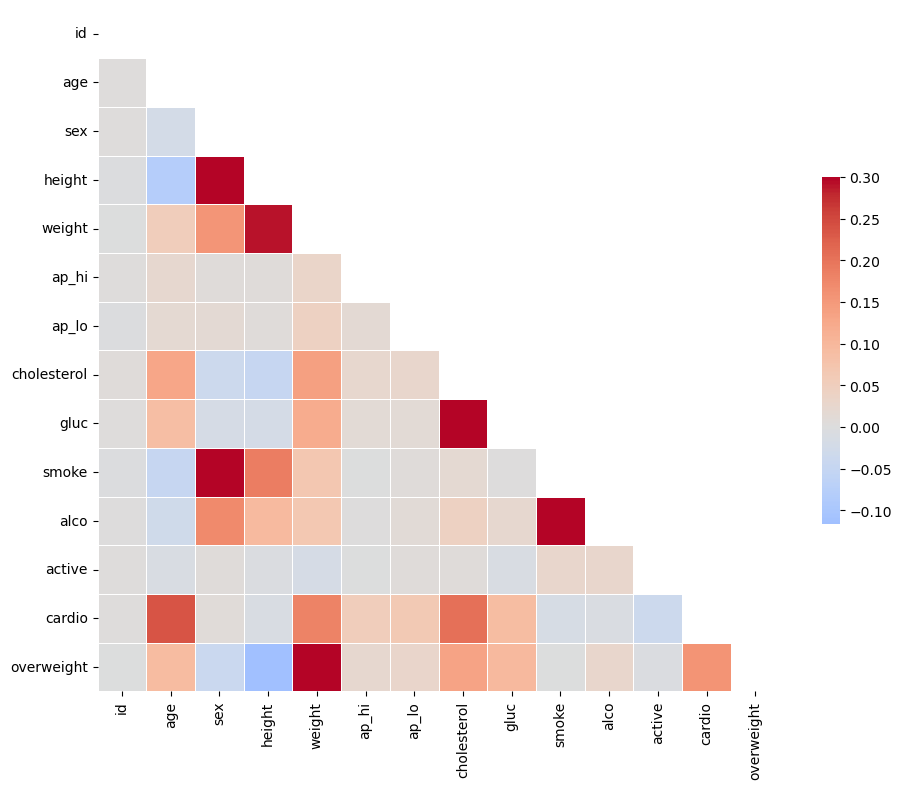

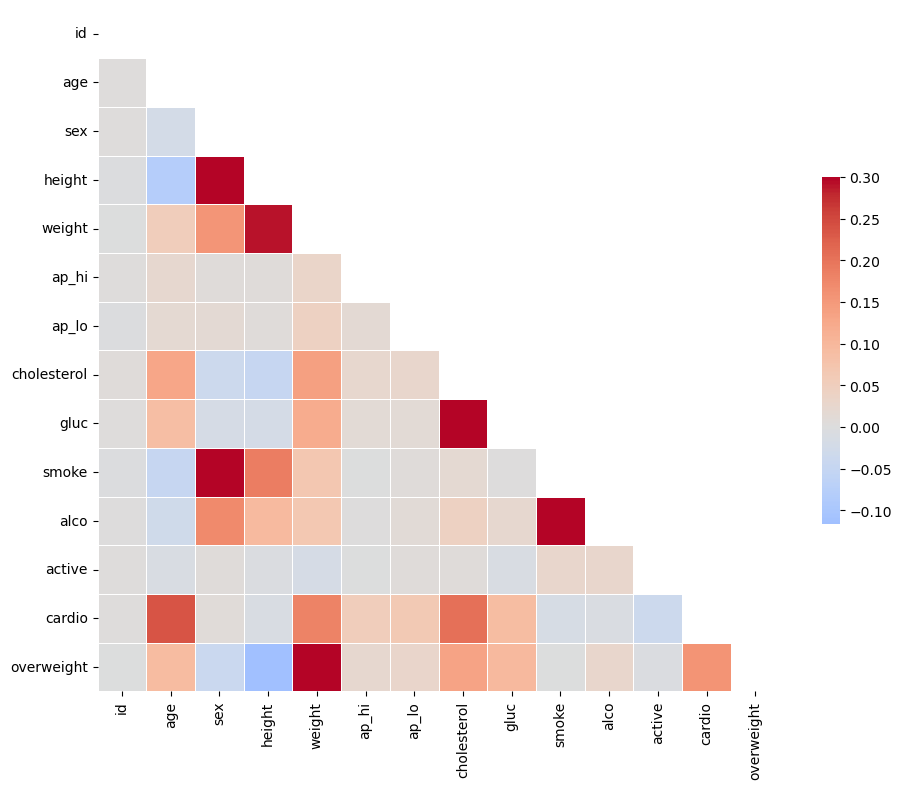

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv('medical_examination.csv')


# Calculate the BMI
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)

# Add 'overweight' column based on BMI
df['overweight'] = df['bmi'].apply(lambda x: 1 if x > 25 else 0)

# Drop the temporary 'bmi' column as it's no longer needed
df.drop('bmi', axis=1, inplace=True)

# Normalize data by making 0 always good and 1 always bad. 
# If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

# Normalize cholesterol and gluc columns
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

# Melt the DataFrame
df_melt = pd.melt(df, id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])

# Create the catplot
plt.figure(figsize=(12, 8))
sns.catplot(data=df_melt, kind='count', x='variable', hue='value', col='cardio')
plt.show()

def draw_heat_map():
  
  # Clean the data
  df_heat = df[
      (df['ap_lo'] <= df['ap_hi']) &
      (df['height'] >= df['height'].quantile(0.025)) &
      (df['height'] <= df['height'].quantile(0.975)) &
      (df['weight'] >= df['weight'].quantile(0.025)) &
      (df['weight'] <= df['weight'].quantile(0.975))
    ]

  # Calculate the correlation matrix
  corr = df.corr()

  # Generate a mask for the upper triangle
  mask = np.triu(np.ones_like(corr, dtype=bool))

  # Set up the matplotlib figure
  fig, ax = plt.subplots(figsize=(11, 9))

  # Draw the heatmap with 'sns.heatmap()'
  sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0,
  square=True, linewidths=.5, cbar_kws={"shrink": .5})

  # Do not modify the next two lines
  fig.savefig('heatmap.png')
  
  return fig

draw_heat_map()